In [16]:
!pip install seaborn

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
# import plotly.express as px
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# import plotly.graph_objs as go
import seaborn as sns

In [18]:
def load_dataset():
    data = pd.read_csv("file:///home/docode/project/data/googleplaystore.csv")
    return data

In [19]:
dataset = load_dataset()
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [20]:
def print_summarize_dataset(dataset):

    print(f"View reference : {dataset.head()}\n\n\n"

             f"Data set info : {dataset.info()}\n\n\n"

             f"Data set form : {dataset.shape}\n\n\n"

             f"Describe the data set : {dataset.describe()}\n\n\n"

          f"Data set isnull :{dataset.isnull().sum()}")


In [21]:
print_summarize_dataset(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
View reference :                                                  App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESI

In [22]:
def clean_dataset(dataset):
    df = dataset[dataset['Android Ver'] != 'NaN']
    df = df[df['Installs'] != 'Free']
    df.Installs = df.Installs.apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
    df.Installs = df.Installs.apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
    df.Installs = df.Installs.apply(lambda x: int(x))
    df.Size = df.Size.apply(lambda x: x.replace('M', '000') if 'M' in x else x)
    df.Size = df.Size.apply(lambda x: x.replace('k','') if 'k' in str(x) else x)
    df.Size = df.Size.apply(lambda x: x.replace('Varies with device','0') if 'Varies with device' in str(x) else x)
    df.Size = df.Size.apply(lambda x: float(x))
    df.Price = df.Price.apply(lambda x: x.replace('$','') if '$' in str(x) else x)
    df.Price = df.Price.astype(float)
    df.Reviews = df.Reviews.apply(lambda x: int(x))
    return df

In [23]:
dataset = clean_dataset(dataset)
dataset.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [24]:
def print_histograms(dataset):
    top10_cateogries = dataset.groupby(dataset['Category'])['Category'].count().sort_values(ascending=False).head(10)
    plt.figure(figsize=(20,10))
    plt.subplot(121)
    top10_cateogries.plot.pie(autopct='%1.f%%',
                                                                 wedgeprops={'linewidth':10,'edgecolor':'white'},
                                                                 shadow=True,
                                                                 fontsize=20)
    plt.title("% Wise Distribution of Categories")

    plt.subplot(122)
    top10_cateogries.plot(marker='o',markersize=10,color='red')
    top10_cateogries.plot(kind='bar',color='green')
    plt.title("Distribution of Categories");
    plt.show()
    
    
    plt.figure(figsize=(12,6))
    sns.countplot(data=dataset,x='Category')
    plt.ylabel("Number of Apps")
    plt.title("Number of Apps per Category", size=20)
    plt.xticks(rotation=90);
    plt.show()
    top10_apps_MaxPrice = dataset[['App','Category','Price']].sort_values(by='Price',ascending=False).drop_duplicates('Price').reset_index().drop('index',axis=1).head(10)
    sns.barplot(data=top10_apps_MaxPrice,x='Category',y='Price')
    plt.xticks(rotation=90)
    plt.title("Categoies wrt total Price");
    plt.show()


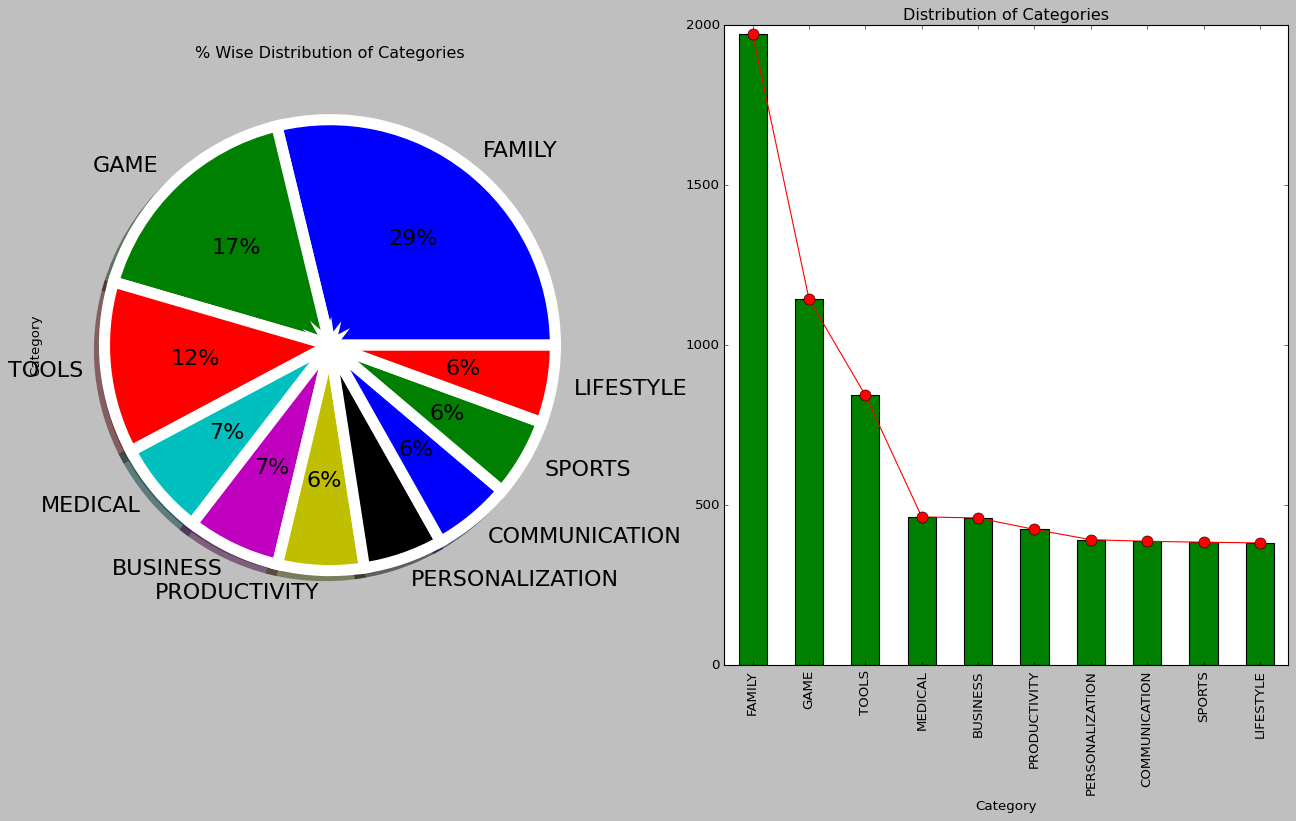

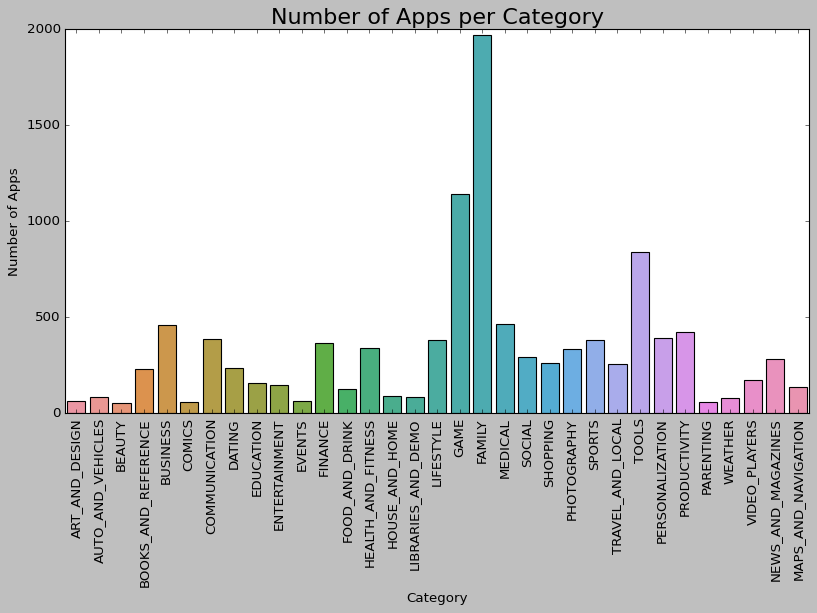

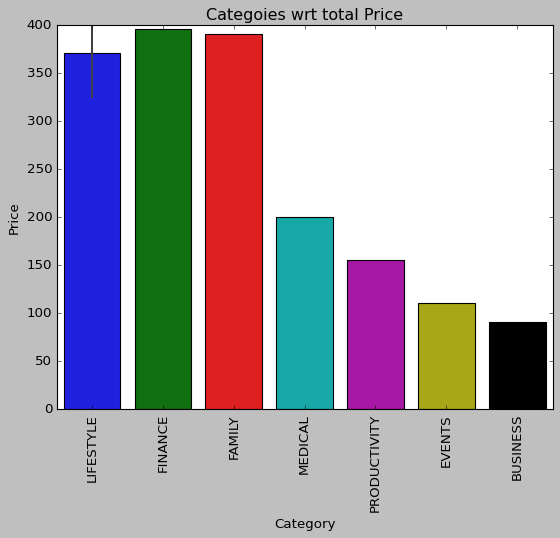

In [25]:
print_histograms(dataset)

In [26]:
def compute_correlations_matrix(dataset):
    plt.figure(figsize=(10,10))
    plt.style.use('classic')
    sns.heatmap(dataset.corr(), annot = True, cmap = 'viridis', linewidth=0.5)
    plt.show()

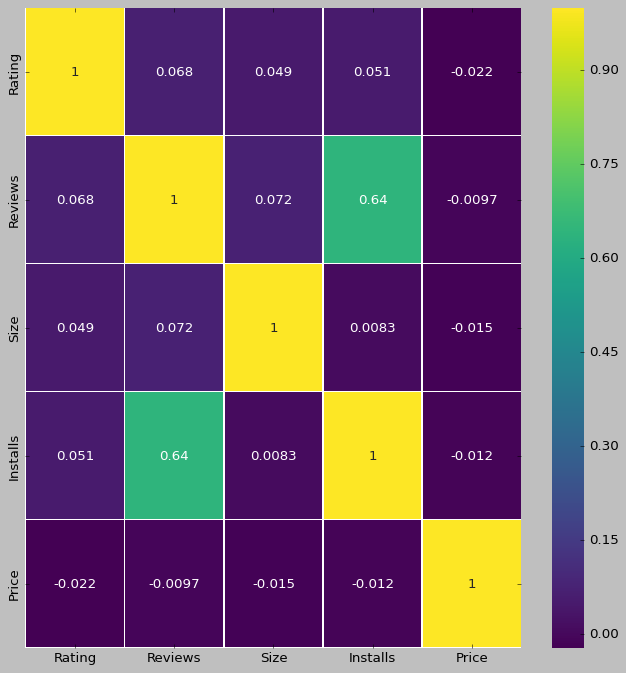

In [27]:
compute_correlations_matrix(dataset)

In [28]:
def print_scatter_matrix():
    pd.plotting.scatter_matrix(dataset, alpha=0.9)
    plt.show()

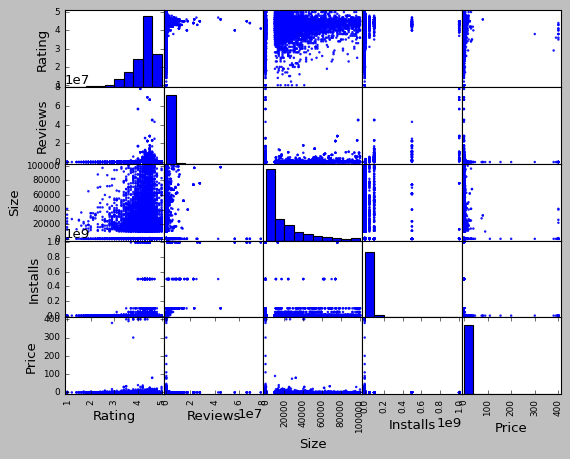

In [29]:
print_scatter_matrix()

In [30]:
!gandalf



 ██████╗ ██╗    ██╗ █████╗ ███████╗ █████╗ ██████╗    ██╗ ██████╗ 
██╔═══██╗██║    ██║██╔══██╗██╔════╝██╔══██╗██╔══██╗   ██║██╔═══██╗
██║   ██║██║ █╗ ██║███████║███████╗███████║██████╔╝   ██║██║   ██║
██║▄▄ ██║██║███╗██║██╔══██║╚════██║██╔══██║██╔══██╗   ██║██║   ██║
╚██████╔╝╚███╔███╔╝██║  ██║███████║██║  ██║██║  ██║██╗██║╚██████╔╝
 ╚══▀▀═╝  ╚══╝╚══╝ ╚═╝  ╚═╝╚══════╝╚═╝  ╚═╝╚═╝  ╚═╝╚═╝╚═╝ ╚═════╝ 
																																 
Booting Gandalf v3.2.1-c2fe00c (production)
Loading parameters:  OK
User abdibaye_j connection: OK


<MY_MOBAPP_STUDIO>
Directory . exists: OK
Pushing exercise: OK
Printing your report:

      REPORT        MY MOBAPP STUDIO 

 Status             SUCCESS          
 Execution Runtime  3.522193         
 Score              [======] 6/6     


Checks detail Report:

 TEST CLEAN DATASET  SUCCESS 



 TEST COMPUTE CORRELATIONS MATRIX  SUCCESS 



 TEST LOAD DATASET  SUCCESS 



 TEST PRINT HISTOGRAMS  SUCCESS 



 TEST PRINT SCATTER MATRIX  SUCCESS 



 TEST PRI